<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-&amp;-Feature-Engineering" data-toc-modified-id="EDA-&amp;-Feature-Engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA &amp; Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#belongs_to_collection" data-toc-modified-id="belongs_to_collection-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>belongs_to_collection</a></span></li><li><span><a href="#Genres" data-toc-modified-id="Genres-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Genres</a></span><ul class="toc-item"><li><span><a href="#Note-that-I-will-perform-rare-label-encoding-later-after-splitting-training-and-validation-set,-because-it-learns-the-parameters-from-train,-and-apply-to-validation-and-test-set-later." data-toc-modified-id="Note-that-I-will-perform-rare-label-encoding-later-after-splitting-training-and-validation-set,-because-it-learns-the-parameters-from-train,-and-apply-to-validation-and-test-set-later.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Note that I will perform rare label encoding later after splitting training and validation set, because it learns the parameters from train, and apply to validation and test set later.</a></span></li></ul></li><li><span><a href="#homepage" data-toc-modified-id="homepage-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>homepage</a></span></li><li><span><a href="#original_language" data-toc-modified-id="original_language-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>original_language</a></span></li><li><span><a href="#Drop-unuseful-variables" data-toc-modified-id="Drop-unuseful-variables-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Drop unuseful variables</a></span></li><li><span><a href="#production_companies" data-toc-modified-id="production_companies-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>production_companies</a></span><ul class="toc-item"><li><span><a href="#Note-that-I-will-perform-rare-label-encoding-later-after-splitting-training-and-validation-set" data-toc-modified-id="Note-that-I-will-perform-rare-label-encoding-later-after-splitting-training-and-validation-set-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Note that I will perform rare label encoding later after splitting training and validation set</a></span></li></ul></li><li><span><a href="#production_countries" data-toc-modified-id="production_countries-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>production_countries</a></span><ul class="toc-item"><li><span><a href="#Note-that-I-will-encode-more-than-3-countries-as-&quot;rare&quot;-after-splitting-training-and-validation-set" data-toc-modified-id="Note-that-I-will-encode-more-than-3-countries-as-&quot;rare&quot;-after-splitting-training-and-validation-set-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Note that I will encode more than 3 countries as "rare" after splitting training and validation set</a></span></li></ul></li><li><span><a href="#spoken_languages" data-toc-modified-id="spoken_languages-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>spoken_languages</a></span><ul class="toc-item"><li><span><a href="#Note-that-more-than-4-languages-usage-can-be-rare-labels." data-toc-modified-id="Note-that-more-than-4-languages-usage-can-be-rare-labels.-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Note that more than 4 languages usage can be rare labels.</a></span></li></ul></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#cast" data-toc-modified-id="cast-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>cast</a></span></li><li><span><a href="#crew" data-toc-modified-id="crew-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>crew</a></span></li><li><span><a href="#release_date" data-toc-modified-id="release_date-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>release_date</a></span></li><li><span><a href="#runtime" data-toc-modified-id="runtime-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>runtime</a></span></li><li><span><a href="#budget" data-toc-modified-id="budget-1.14"><span class="toc-item-num">1.14&nbsp;&nbsp;</span>budget</a></span></li><li><span><a href="#popularity" data-toc-modified-id="popularity-1.15"><span class="toc-item-num">1.15&nbsp;&nbsp;</span>popularity</a></span></li></ul></li></ul></div>

# TMDB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB'

In [2]:
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))

import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score, mean_squared_error

import json
import ast
#import eli5
#import shap
from catboost import CatBoostRegressor
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.linear_model import LinearRegression


In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/TMDB/datasets')

In [5]:
data = pd.read_csv(path/'train.csv')
print(data.shape)
data.head(2)

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [6]:
data_test = pd.read_csv(path/'test.csv')
data_test.shape

(4398, 22)

Missing values?

In [7]:
missing_vars = [var for var in data.columns if data[var].isnull().sum()>0]

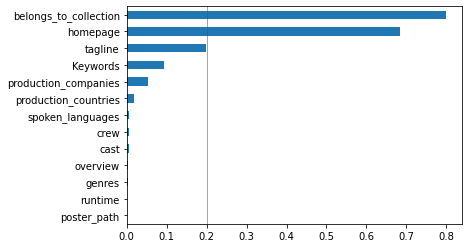

In [8]:
data[missing_vars].isnull().mean().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.2, linewidth=0.5, color='red');

`belongs_to_collection` and `homepage` have a lot of missing values in the variable. Other 11 variables have less than 20% of missing values.

What about test set?

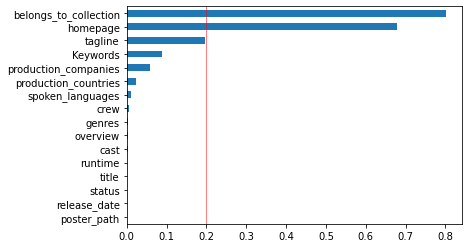

In [9]:
missing_vars_test = [var for var in data_test.columns if data_test[var].isnull().sum()>0]

data_test[missing_vars_test].isnull().mean().sort_values(ascending=True).plot(kind='barh')
plt.axvline(x=0.2, linewidth=0.5, color='red');

In [10]:
len(missing_vars), len(missing_vars_test)

(13, 16)

In [11]:
set(missing_vars_test).difference(set(missing_vars))

{'release_date', 'status', 'title'}

Test set has more variables which have missing values: release_date, status, title

## EDA & Feature Engineering

In this section, I explore the dataset. 

We have 8 variables which have dictionary values in column: 'belongs_to_collection', 'genres','production_companies','production_countries', 'spoken_languages', 'Keywords','cast', 'crew'.

So, I will figure out if we can extract meaningful information from those variables. Also, if I need to perform feature engineering to extract useful features, I will do here. 

### belongs_to_collection

In [12]:
def data_dict(data):
    """Function to analyze dictionary values in columns"""
    for col in dict_columns:
        data[col] = data[col].apply(lambda x: {} if pd.isnull(x) else ast.literal_eval(x))
    return data
    
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
               'production_countries', 'spoken_languages', 'Keywords',
               'cast', 'crew']

df_train = data_dict(data)
df_test = data_dict(data_test)

In [13]:
df_train['belongs_to_collection'].apply(lambda x: len(x) if x != np.nan else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

`belongs_to_collection` has more than 80% of missing values. 2396 are missing and 604 contain information including id, name, poster_path, backdrop_path. 

I think only `name` information which shows whether the movie belongs to collection is useful. 

In [14]:
for i, e in enumerate(data['belongs_to_collection'][:5]):
    print(i, e)

0 [{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]
1 [{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}]
2 {}
3 {}
4 {}


Therefore, I will create `is_collection` feature which indicates whether the movie belongs to the collection or not, and drop the original `belongs_to_collection` feature

In [15]:
df_train['is_collection'] = df_train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
df_test['is_collection'] = df_test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

# drop belongs_to_collection
df_train.drop('belongs_to_collection', axis=1, inplace=True)
df_test.drop('belongs_to_collection', axis=1, inplace=True)

In [16]:
df_train.head(2)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1


In [17]:
# check if is_collection has missing value
df_train['is_collection'].isnull().mean()

0.0

In [18]:
df_test['is_collection'].isnull().mean()

0.0

### Genres

In [19]:
for i, e in enumerate(df_train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


We can see that some movies have multiple genres. 

Let's figure out how many genres the movie has?

In [20]:
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

In [22]:
df_train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

2    0.324000
3    0.300000
1    0.197667
4    0.131000
5    0.037000
6    0.007000
0    0.002333
7    0.001000
Name: genres, dtype: float64

We can consider more then 5 genres are rare label, because they have less than 5%. 

what about test?

In [21]:
df_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    1407
3    1308
1     895
4     574
5     169
6      27
0      16
8       1
7       1
Name: genres, dtype: int64

In [23]:
df_test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

2    0.469000
3    0.436000
1    0.298333
4    0.191333
5    0.056333
6    0.009000
0    0.005333
8    0.000333
7    0.000333
Name: genres, dtype: float64

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. I consider any value below 5% can be a rare label. 

So, as we can see above, more than 5 genres can be rare labels.

#### Note that I will perform rare label encoding later after splitting training and validation set, because it learns the parameters from train, and apply to validation and test set later. 

I will perform the following steps: 

    1) Extract the number of genres, `num_genres` from `genres`
    2) Make `num_genres` a categorical variable. 
    3) Make 0 value to missing value
    4) Drop the original `genres` column from both df_train and df_test dataset
   

In [27]:
# 1) Extract the num_genres from genres 
df_train['num_genres'] = df_train['genres'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_genres'] = df_test['genres'].apply(lambda x: len(x) if x != {} else 0)

df_train.head(5)

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,is_collection,num_genres
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,1,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,1,4
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,1
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,2
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,2


In [32]:
# 2) Make `num_genres` a categorical variable. 
df_train['num_genres'] = df_train['num_genres'].astype('O')
df_test['num_genres'] = df_test['num_genres'].astype('O')

In [40]:
# 3) Make 0 value to missing values
df_train['num_genres'] = df_train['num_genres'].replace(0, 'missing')
df_test['num_genres'] = df_test['num_genres'].replace(0, 'missing')

In [35]:
# 4) drop the original column from df_train and df_test
df_train.drop('genres', axis=1, inplace=True)
df_test.drop('genres', axis=1, inplace=True)

### homepage

We found above, there are a lot of missing values in homepage variable both in training and test set. It might be better to create `is_homepage` column which indicates whether it has homepage or not. 


In [43]:
df_train['homepage'].isnull().mean()

0.6846666666666666

In [86]:
df_train['is_homepage'] = np.where(df_train['homepage'].isnull(), 0, 1)
df_test['is_homepage'] = np.where(df_test['homepage'].isnull(), 0, 1)

In [87]:
# drop original homepage column
df_train.drop('homepage', axis=1, inplace=True)
df_test.drop('homepage', axis=1, inplace=True)

### original_language

`Original_langauge` has high cardinality. highly cardinal variables tend to have many infrequent or rare categories

We found that the majority of movies' original language is English. So, I will create a variable which indicates whether the movie is in English or not.

<AxesSubplot:>

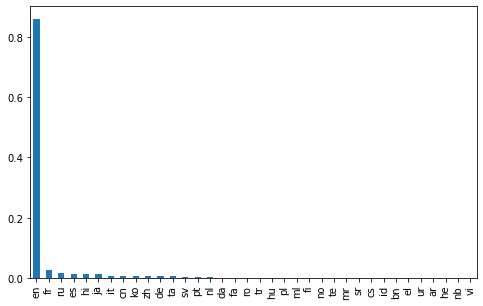

In [100]:
(df_train['original_language'].value_counts() /len(df_train)).plot(kind='bar', figsize=(8,5))

<AxesSubplot:>

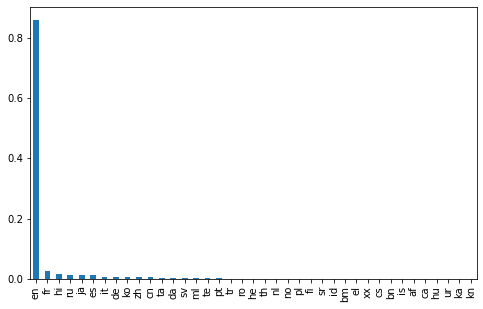

In [101]:
(df_test['original_language'].value_counts() / len(df_test)).plot(kind='bar', figsize=(8,5))

In [102]:
# create is_English variable
df_train['is_English'] = np.where((df_train['original_language'] == 'en'), 1, 0)
df_test['is_English'] = np.where((df_test['original_language'] == 'en'), 1, 0)

In [106]:
# drop original language column
df_train.drop('original_language', axis=1, inplace=True)
df_test.drop('original_language', axis=1, inplace=True)

### Drop unuseful variables

I think `original_title`, `overview`, `poster_path`, `tagline`, `title` are useful to keep when building a machine learning model, so I will drop those variables

In [107]:
df_train.drop(['original_title', 'overview', 'poster_path', 'tagline', 'title'], axis=1, inplace=True)
df_test.drop(['original_title', 'overview', 'poster_path', 'tagline', 'title'], axis=1, inplace=True)

### production_companies

In [108]:
for i, e in enumerate(df_train['production_companies'][:5]):
    print(i, e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 {}
4 {}


In [113]:
df_train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts() / len(df_train)

1     0.258333
2     0.244667
3     0.194000
4     0.104000
5     0.055333
0     0.052000
6     0.039333
7     0.020667
8     0.014000
9     0.009667
10    0.002333
11    0.002333
12    0.001000
16    0.000667
15    0.000667
14    0.000333
13    0.000333
17    0.000333
Name: production_companies, dtype: float64

__Insight__
- 0 value can be missing values. 
- More than 5 production companies can be encoded as rare labels because they have less than 5% values

Therefore, I will perform the following steps:

- 1) Extract the number of production companies and create a new variable called `num_pro_comps`
- 2) Convert `num_pro_comps` dtypes to categorical variable (object)
- 3) Change 0 value to 'missing' label
- 4) Drop the original column `production_companies`

#### Note that I will perform rare label encoding later after splitting training and validation set

In [114]:
# 1) Extract the number of production companies and create a new variable called num_pro_comps
df_train['num_pro_comps'] = df_train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_pro_comps'] = df_test['production_companies'].apply(lambda x: len(x) if x != {} else 0)

In [116]:
# 2) Extract the number of production companies and create a new variable called num_pro_comps
df_train['num_pro_comps'] = df_train['num_pro_comps'].astype('O')
df_test['num_pro_comps'] = df_test['num_pro_comps'].astype('O')

In [117]:
# 3) Change 0 value to 'missing' label
df_train['num_pro_comps'] = df_train['num_pro_comps'].replace(0, 'missing')
df_test['num_pro_comps'] = df_test['num_pro_comps'].replace(0, 'missing')

In [119]:
# 4) Drop the original column production_companies
df_train.drop('production_companies', axis=1, inplace=True)
df_test.drop('production_companies', axis=1, inplace=True)

### production_countries

In [121]:
for i, e in enumerate(df_train['production_countries'][:5]):
    print(i, e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 [{'iso_3166_1': 'KR', 'name': 'South Korea'}]


In [124]:
df_train['production_countries'].apply(lambda x: len(x) if x != {} else 1).value_counts() / len(df_train)

1    0.759000
2    0.175000
3    0.038667
4    0.019000
5    0.007000
6    0.001000
8    0.000333
Name: production_countries, dtype: float64

The majority production countries is one or two countries. More than 3 countries can be considered as rare labels. 

Let's perform the following steps:

- 1) Extract the number of production countries and create new variable called `num_pro_count'
- 2) Convert the dtype as object
- 3) Drop the original column `production_countries`

#### Note that I will encode more than 3 countries as "rare" after splitting training and validation set

In [125]:
# 1) Extract the number of production countries and create new variable called `num_pro_count'
df_train['num_pro_count'] = df_train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_pro_count'] = df_test['production_countries'].apply(lambda x: len(x) if x != {} else 0)

# 2) Convert the dtype as object
df_train['num_pro_count'] = df_train['num_pro_count'].astype('O')
df_test['num_pro_count'] = df_test['num_pro_count'].astype('O')

# 3) Drop the original column production_countries
df_train.drop('production_countries', axis=1, inplace=True)
df_test.drop('production_countries', axis=1, inplace=True)

### spoken_languages

I will extract the number of spoken languages from `spoken_lanuages`. The procedure is the same as the above

In [127]:
df_train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0).value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
6       6
7       6
8       2
9       1
Name: spoken_languages, dtype: int64

In [133]:
# 1) Extract the number of spoken languages and create new variable called `num_spoken_lang'
df_train['num_spoken_lang'] = df_train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_spoken_lang'] = df_test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

# 2) Convert the dtype as object
df_train['num_spoken_lang'] = df_train['num_spoken_lang'].astype('O')
df_test['num_spoken_lang'] = df_test['num_spoken_lang'].astype('O')

# 3) 0 value can be missing value
df_train['num_spoken_lang'] = df_train['num_spoken_lang'].replace(0, 'missing')
df_test['num_spoken_lang'] = df_test['num_spoken_lang'].replace(0, 'missing')

# 3) Drop the original column production_countries
df_train.drop('spoken_languages', axis=1, inplace=True)
df_test.drop('spoken_languages', axis=1, inplace=True)

In [135]:
df_train['num_spoken_lang'].value_counts() / len(df_train)

1          0.701667
2          0.183000
3          0.072000
4          0.024000
5          0.007667
missing    0.006667
6          0.002000
7          0.002000
8          0.000667
9          0.000333
Name: num_spoken_lang, dtype: float64

#### Note that more than 4 languages usage can be rare labels. 

### Keywords

In [141]:
df_train['Keywords'].apply(lambda x: len(x) if x != {} else 0).value_counts()

5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
15      59
14      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
28       2
30       2
32       2
29       2
31       2
37       2
39       1
97       1
43       1
40       1
33       1
38       1
149      1
Name: Keywords, dtype: int64

In [142]:
for i, e in enumerate(df_train['Keywords'][:5]):
    print(i, e)

0 [{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
1 [{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
2 [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
3 [{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'ne

In [143]:
# 1) Extract the number of keywords and create new variable called `n_keywords'
df_train['n_keywords'] = df_train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
df_test['n_keywords'] = df_test['Keywords'].apply(lambda x: len(x) if x != {} else 0)

# 2) Convert the dtype as object
df_train['n_keywords'] = df_train['n_keywords'].astype('O')
df_test['n_keywords'] = df_test['n_keywords'].astype('O')

# 3) Drop the original column production_countries
df_train.drop('Keywords', axis=1, inplace=True)
df_test.drop('Keywords', axis=1, inplace=True)

<AxesSubplot:>

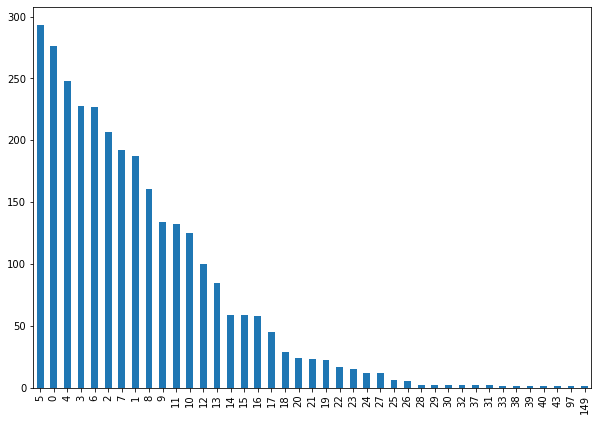

In [145]:
df_train['n_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10, 7))

We can create num_keywords' range

In [156]:
# set up bins
bins = [0, 5, 10, 15, 20, 150]

# set up labels
labels = ['<5', '<10', '<15', '<20', '>30']

# create num_keyword column
df_train['num_keywords'] = pd.cut(df_train['n_keywords'], bins=bins, labels=labels, include_lowest=True)
df_test['num_keywords'] = pd.cut(df_test['n_keywords'], bins=bins, labels=labels, include_lowest=True)

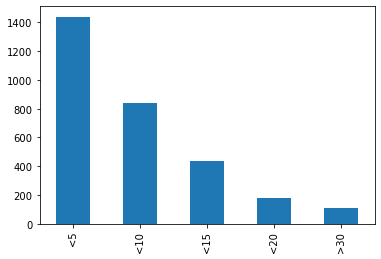

In [158]:
df_train['num_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar');

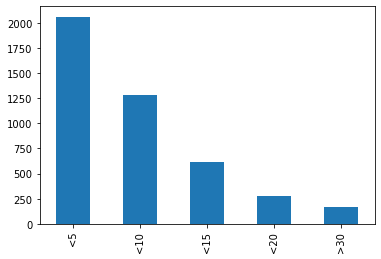

In [159]:
df_test['num_keywords'].value_counts().sort_values(ascending=False).plot(kind='bar');

In [161]:
# drop n_keywords
df_train.drop('n_keywords', axis=1, inplace=True)
df_test.drop('n_keywords', axis=1, inplace=True)

### cast

`cast` has names of actor or actress, genders, and character information. I would like to extract the number of casting people and the number of genders

In [168]:
# The number of casted people in movies
df_train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts()[:10]

15    212
16    165
10    135
13    129
12    124
11    122
17    118
9     118
18    115
14    110
Name: cast, dtype: int64

In [170]:
for i, e in enumerate(df_train['cast'][0]):
    print(i, e)

0 {'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}
1 {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}
2 {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}
3 {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}
4 {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}
5 {'cast_id': 9, 'char

In [171]:
# the number of casted people
df_train['num_cast'] = df_train['cast'].apply(lambda x: len(x) if x != {} else 0)
df_test['num_cast'] = df_test['cast'].apply(lambda x: len(x) if x != {} else 0)

- `gender` information 
- 0: unspecified
- 1: female
- 2: male

In [179]:
# the number of each gender 
df_train['num_g_unspecified'] = df_train['cast'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
df_train['num_g_female'] = df_train['cast'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
df_train['num_g_male'] = df_train['cast'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

df_test['num_g_unspecified'] = df_test['cast'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
df_test['num_g_female'] = df_test['cast'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
df_test['num_g_male'] = df_test['cast'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

In [240]:
print('There are {} data which we do not know gender information'.format(len(df_train[df_train['num_g_unspecified']!=0])))
print(df_train.shape)

There are 2635 data which we do not know gender information
(3000, 21)


2635 data out of 3000 do not provide gender information correctly, so I will remove all gender information from dataset. 

In [181]:
# drop all gender information and original cast column
df_train.drop(['num_g_unspecified', 'num_g_female', 'num_g_male', 'cast'], axis=1, inplace=True)
df_test.drop(['num_g_unspecified', 'num_g_female', 'num_g_male', 'cast'], axis=1, inplace=True)

### crew

`crew` contains name, department, gender, job title. I would like to extract the number of crew members for the movies and the number of genders. 

In [188]:
for i, e in enumerate(df_train['crew'][0]):
    print(i, e)

0 {'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}
1 {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}
2 {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}
3 {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}
4 {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}
5 {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id'

In [187]:
df_train['crew'].apply(lambda x: len(x) if x!={} else 0).value_counts()

2      179
11     127
3      126
10     126
12     110
      ... 
154      1
156      1
172      1
194      1
183      1
Name: crew, Length: 153, dtype: int64

There are 16 of 0 value in `num_crew` and this should be missing value. 

In [191]:
df_train['num_crew'].min(), df_train['num_crew'].max()

(0, 194)

In [192]:
len(df_train[df_train['num_crew']==0])

16

In [233]:
# 1) extract the number of crew people
df_train['n_crew'] = df_train['crew'].apply(lambda x: len(x) if x != {} else 0)
df_test['n_crew'] = df_test['crew'].apply(lambda x: len(x) if x != {} else 0)


# 2) create num_crew range category which indicate small-size crew, medium size crew, large size crew
bins = [0, 20, 80, 200]
labels = ['small', 'medium', 'large']
df_train['num_crew'] = pd.cut(df_train['n_crew'], bins=bins, labels=labels, include_lowest=False)
df_test['num_crew'] = pd.cut(df_test['n_crew'], bins=bins, labels=labels, include_lowest=False)


# 3) convert dtype to Object
df_train['num_crew'] = df_train['num_crew'].astype('O')
df_test['num_crew'] = df_test['num_crew'].astype('O')


# 4) encode np.nan (originally 0 value) as 'missing'
df_train['num_crew'].fillna('missing', inplace=True)
df_test['num_crew'].fillna('missing', inplace=True)

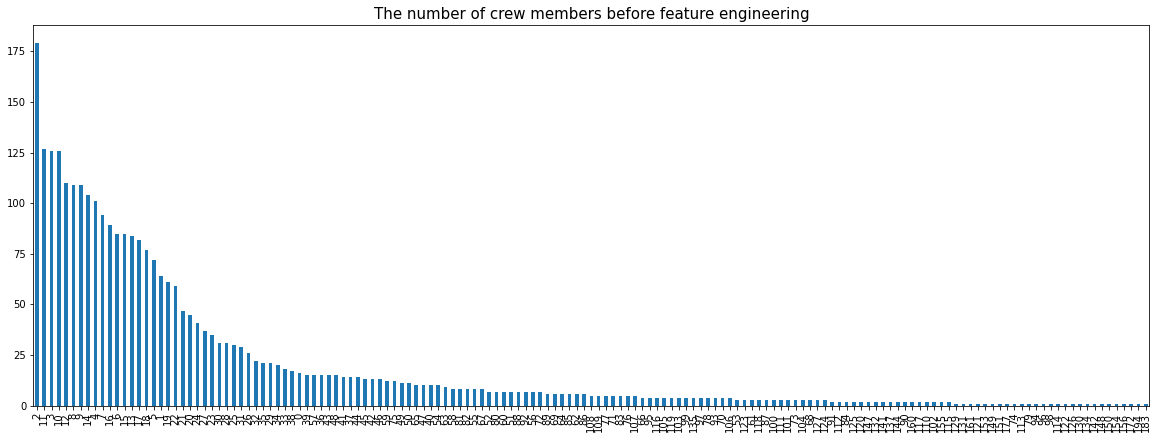

In [222]:
df_train['n_crew'].value_counts().plot(kind='bar', figsize=(20, 7))
plt.title('The number of crew members before feature engineering', fontsize=15);

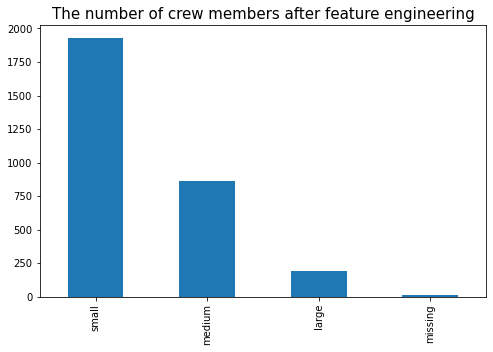

In [224]:
df_train['num_crew'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('The number of crew members after feature engineering', fontsize=15);

In [225]:
# extract gender information from crew
df_train['num_g_unspecified_crew'] = df_train['crew'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
df_train['num_g_female_crew'] = df_train['crew'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
df_train['num_g_male_crew'] = df_train['crew'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

df_test['num_g_unspecified_crew'] = df_test['crew'].apply(lambda x: sum([1 for i in x if i['gender']==0]))
df_test['num_g_female_crew'] = df_test['crew'].apply(lambda x: sum([1 for i in x if i['gender']==1]))
df_test['num_g_male_crew'] = df_test['crew'].apply(lambda x: sum([1 for i in x if i['gender']==2]))

In [229]:
len(df_train[df_train['num_g_unspecified_crew']!=0])

2671

In [230]:
df_train.shape

(3000, 26)

I found that there are a lot of unspecified gender information for crew members, 2,671 out of 3000, so I think the gender information of crew members are not useful. I will remove all from the dataset. 

In [231]:
# drop gender information for crew members and original crew column
df_train.drop(['crew', 'num_g_unspecified_crew', 'num_g_female_crew', 'num_g_male_crew', 'n_crew'], 
              axis=1, inplace=True)
df_test.drop(['crew', 'num_g_unspecified_crew', 'num_g_female_crew', 'num_g_male_crew', 'n_crew'], 
              axis=1, inplace=True)

### release_date

`release_date` has month-date-year format. I would like to extract `year` and `month` information from it. 

In [257]:
# 1) convert dtype of release_date as datetime64
df_train['release_date'] = df_train['release_date'].astype('datetime64')
df_test['release_date'] = df_test['release_date'].astype('datetime64')


# 2) Extract year and month information 
df_train['release_year'] = df_train['release_date'].dt.year
df_train['release_month'] = df_train['release_date'].dt.month

df_test['release_year'] = df_test['release_date'].dt.year
df_test['release_month'] = df_test['release_date'].dt.month

In [259]:
# 3) drop release_date
df_train.drop('release_date', axis=1, inplace=True)
df_test.drop('release_date', axis=1, inplace=True)

### runtime

In [269]:
# check if there is misisng values
[var for var in df_train.columns if df_train[var].isnull().mean()>0]

['runtime']

In [270]:
[var for var in df_test.columns if df_test[var].isnull().mean()>0]

['runtime', 'status', 'release_year', 'release_month']

Both training and test data have missing values in `runtime`

In [271]:
df_train['runtime'].isnull().mean()

0.0006666666666666666

In [272]:
df_test['runtime'].isnull().mean()

0.0009095043201455207

Also, there are 12 data that have 0 value in runtime. This does not make sense, and they can be missing values. 

In [274]:
len(df_train[df_train['runtime']==0])

12

In [275]:
len(df_test[df_test['runtime']==0])

9

I will encode 0 values in runtime as NaN

In [289]:
df_train['runtime'] = df_train['runtime'].replace(0, np.nan)
df_test['runtime'] = df_test['runtime'].replace(0, np.nan)

In [290]:
# check the proportion of misisng value
print(df_train['runtime'].isnull().mean())
print(df_test['runtime'].isnull().mean())

0.004666666666666667
0.0029558890404729424


In [287]:
copy['runtime'].isnull().mean()

0.004666666666666667

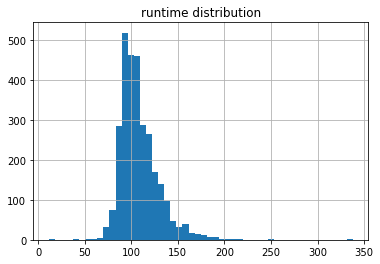

In [292]:
# runtime distribution 
df_train['runtime'].hist(bins=50)
plt.title('runtime distribution', fontsize=12);

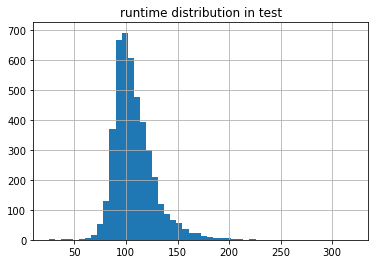

In [293]:
df_test['runtime'].hist(bins=50)
plt.title('runtime distribution in test', fontsize=12);

Both training and test's runtime show normal distribution with outliers. 

### budget

`budget` in training and test set do not have missing values. However, I found there are some 0 values 

In [295]:
print(df_train['budget'].isnull().mean())
print(df_test['budget'].isnull().mean())

0.0
0.0


In [297]:
len(df_train[df_train['budget']==0])

812

In [298]:
len(df_test[df_test['budget']==0])

1211

That doesn't make sense, so I consider 0 budget as missing values

In [299]:
# encode 0 value as NaN
df_train['budget'] = df_train['budget'].replace(0, np.nan)
df_test['budget'] = df_test['budget'].replace(0, np.nan)

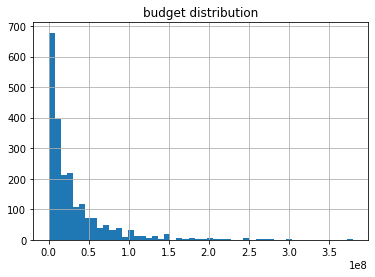

In [300]:
# budget distribution 
df_train['budget'].hist(bins=50)
plt.title('budget distribution', fontsize=12);

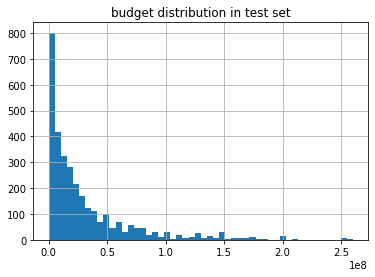

In [301]:
# budget distribution 
df_test['budget'].hist(bins=50)
plt.title('budget distribution in test set', fontsize=12);

Both budget in training and test set show right skewed distribution. 

### popularity

In [244]:
df_train['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [245]:
df_test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [246]:
df_train[df_train['status']=='Rumored']

,id,budget,imdb_id,popularity,release_date,runtime,status,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew
609,610,0,tt0120254,5.121309,1/1/97,71.0,Rumored,273644,1,4,0,1,missing,0,8,<5,4,small
1007,1008,0,tt1860180,0.007877,2/5/11,60.0,Rumored,60,0,1,0,1,missing,1,1,<5,1,small
1216,1217,0,tt0091024,10.273979,8/22/86,89.0,Rumored,13418091,0,2,0,1,1,1,1,<10,13,small
1618,1619,891000,tt0145394,0.179246,2/20/98,89.0,Rumored,229000,0,1,0,1,missing,1,2,<5,1,small


In [247]:
df_train[df_train['budget']==0]

,id,budget,imdb_id,popularity,release_date,runtime,status,revenue,is_collection,num_genres,is_homepage,is_English,num_pro_comps,num_pro_count,num_spoken_lang,num_keywords,num_cast,num_crew
4,5,0,tt1380152,1.148070,2/5/09,118.0,Released,3923970,0,2,0,0,missing,1,1,<5,4,small
7,8,0,tt0391024,1.949044,1/15/04,84.0,Released,2586511,0,1,0,1,missing,0,2,<10,4,small
8,9,0,tt0117110,6.902423,2/16/96,100.0,Released,34327391,1,5,0,1,3,1,1,<5,12,small
11,12,0,tt0093857,10.543750,7/10/87,98.0,Released,22642033,1,1,0,1,4,1,1,<10,14,small
17,18,0,tt1700845,4.183558,12/25/13,111.0,Released,1234254,0,2,0,1,4,1,1,<5,19,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,2990,0,tt0206367,0.851599,5/11/01,75.0,Released,100202,0,2,0,1,3,1,2,<5,19,small
2990,2991,0,tt0118663,1.560980,3/28/97,90.0,Released,7240837,0,2,0,1,2,0,1,<10,30,small
2994,2995,0,tt0105327,7.438381,9/18/92,106.0,Released,14715067,0,1,0,1,1,1,1,<5,7,small
2995,2996,0,tt0109403,9.853270,4/22/94,102.0,Released,1596687,0,2,0,1,2,1,1,<20,15,small
